## Exploratory Data Analysis in Python

**Course Structure:**
* Chapter 1. Getting to Know a Dataset
* Chapter 2. Data Cleaning and Imputation
* Chapter 3. Relations in Data
* Chapter 4. Turning Exploratory Analysis Into Action

### CHAPTER 1. Getting to Know a Dataset

#### Part 1.1 Initial exploration

**Exploratory Data Analysis (EDA):**
* The process of **reviewing and cleaning data** to **derive insights** and **generate hypothesis** 
* Prepare data for use in a machine learning model
* Use *'.head()'* to get a first look at the data
* Use *'.info()'* to gather more information
* Use *'.value_counts()'* to look at categorical columns
* Use *'.describe()'* to look at numerical columns
* Use *'seaborn'* and *'matplotlib.pyplot'* library to visualize data

In [1]:
# Code for part 1.1

# functions for initial exploration
import pandas as pd

# get the data
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# print the first five rows
print(unemployment.head())

# print summary of non-missing values and data types
print(unemployment.info())

# print summary statistics for numerical columns
print(unemployment.describe())

# count the values associated with each continent
print(unemployment['continent'].value_counts())


  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

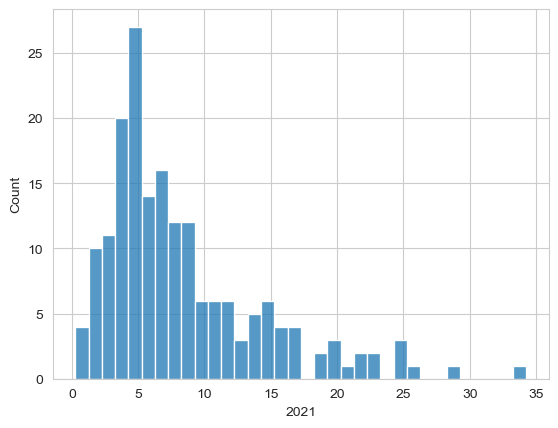

In [3]:
# Code for part 1.1 (continue)

# global unemployment in 2021
import seaborn as sns
import matplotlib.pyplot as plt

# create a histogram of 2021 unemployment
sns.histplot(data=unemployment, x="2021",binwidth=1)
plt.show()


#### Part 1.2 Data validation

* An early step in EDA
* Verify whether **data types and ranges** are as expected
* Use *'.dtypes'* to look at data types
* Use *'.astype()'* to change data types
* Use *'.isin()'* to validate categorical data
* Use *'.min(), .max()'* and *sns.boxplot()* to validate numerical data

In [5]:
# Code for part 1.2

# get the data
import pandas as pd
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# detecting data types
print(unemployment.dtypes)

# validating continents whether it is outside Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
print(unemployment[not_oceania])


country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object
    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
17

0.26 33.56


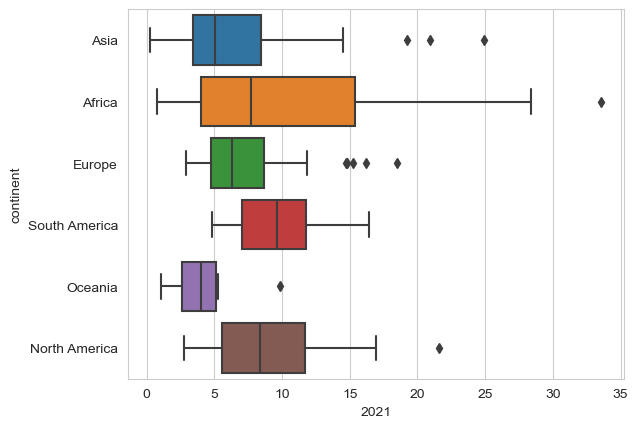

In [6]:
# Code for part 1.2 (continue)

# validating range
import seaborn as sns
import matplotlib.pyplot as plt

# print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x="2021", y="continent")
plt.show()

#### Part 1.3 Data summarization

*